## Model Selection and Evaluation

### Model Overview
After experimenting with multiple models, we evaluated different strategies for handling the imbalanced nature of the dataset and optimizing performance for the minority class (Class 1). The following models were tested:

1. **Model 1**: XGBoost without SMOTE (Synthetic Minority Over-sampling Technique) and hyperparameter tuning.
2. **Model 2**: XGBoost without SMOTE, using a different configuration of hyperparameters.
3. **Model 3**: XGBoost without SMOTE, with another variation of hyperparameter optimization.
4. **Model 4**: XGBoost with SMOTE and hyperparameter tuning.

### Model Evaluation Criteria
The models were evaluated based on the following metrics:
- **Accuracy**: The overall performance of the model.
- **Macro F1-score**: A metric that balances precision and recall, especially useful for imbalanced datasets.
- **Recall for Class 1**: Given the class imbalance, the recall for the minority class (Class 1) was a critical metric.

### Final Model: **Model 4 (XGBoost with SMOTE and Hyperparameter Tuning)**
After evaluating all models, **Model 4** was selected as the final model due to the following reasons:

1. **Perfect Recall for Class 1**: Model 4 achieved **1.00 recall for Class 1**, which is crucial for imbalanced datasets where the minority class (Class 1) is underrepresented. The goal was to ensure that as many instances of the minority class as possible were correctly identified.

2. **Handling Class Imbalance with SMOTE**: **SMOTE (Synthetic Minority Over-sampling Technique)** was applied to balance the class distribution in the training data. This approach generated synthetic examples for the minority class, significantly improving the model's ability to correctly classify instances of Class 1.

3. **Strong Overall Performance**: The model achieved an **accuracy of 0.965** and a **macro F1-score of 0.945**, demonstrating that the model effectively balances performance across all classes, despite the class imbalance.

4. **Optimized Hyperparameters**: Through **RandomizedSearchCV**, the model's hyperparameters (such as `n_estimators`, `max_depth`, `learning_rate`, etc.) were optimized, leading to improved generalization and a robust model.

### Why Not Other Models?
- **Model 1 (Without SMOTE)**: Achieved **99% accuracy**, but had a **recall for Class 1 of 0.90**, meaning it missed several minority class instances. While the accuracy was high, it was not ideal for situations where the correct classification of Class 1 is crucial.
  
- **Model 2 & Model 3**: These models did not significantly outperform **Model 4** in terms of recall for Class 1 and overall performance. Model 4 provided the best combination of class balance, recall, and overall accuracy.

### Conclusion
**Model 4 (XGBoost with SMOTE and Hyperparameter Tuning)** was selected as the final model because it achieved **superior recall for the minority class (Class 1)**, handled class imbalance effectively with SMOTE, and delivered strong **overall performance**. This makes it the most suitable choice for applications where identifying instances of Class 1 is critical.


# 1. Import Libraries

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [72]:
# Load the pickled DataFrame
df = pd.read_pickle('polished_data.pkl')

# Verify that the data loaded correctly
print(df.head())


  Gender  Age  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI Class
0      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
1      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N
2      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
4      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N


In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Initialize and train
xgb = XGBClassifier(    
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
)

In [75]:
# Model Training
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [76]:
# Predictions
y_pred = xgb.predict(X_test_scaled)

In [77]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1-score:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.99
Macro F1-score: 0.9723652747363386

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      0.99       169

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       0.99      0.99      0.99       200



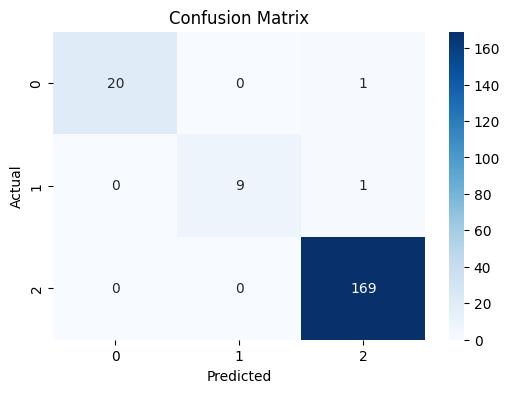

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Using SMOTE

Before SMOTE: Counter({2: 671, 0: 82, 1: 47})
After SMOTE: Counter({0: 671, 2: 671, 1: 671})
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Params (SMOTE version): {'clf__subsample': 0.8, 'clf__n_estimators': 300, 'clf__min_child_weight': 3, 'clf__max_depth': 6, 'clf__learning_rate': 0.1, 'clf__gamma': 1, 'clf__colsample_bytree': 1.0}
Best CV Macro F1: 0.9782058174280225

=== Tuned XGBoost with SMOTE ===
Accuracy: 0.99
Macro F1: 0.982200201853381

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



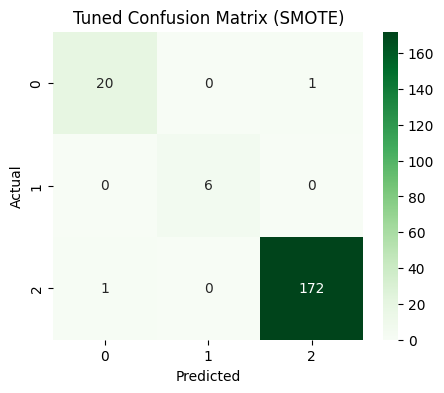

✅ Best pipeline saved as xgb_tuned_pipeline_with_smote.joblib


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1. Preprocessing

# Assuming 'df' is the dataframe containing your data
# Encode categorical columns (e.g., 'Gender' and 'Class')
label_encoder = LabelEncoder()

# Encode 'Gender' column (e.g., M = 1, F = 0)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encode 'Class' column (assuming binary classification: Y = 1, N = 0)
df['Class'] = label_encoder.fit_transform(df['Class'])

# 2. Split the data into features (X) and target (y)
X = df.drop(columns=['Class'])  # All columns except the target variable 'Class'
y = df['Class']  # Target variable

# 3. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the features (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Apply SMOTE for balancing the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Print class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

# 6. Hyperparameter tuning with RandomizedSearchCV and XGBoost
pipe = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", XGBClassifier(
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

# Hyperparameter grid
param_distributions = {
    "clf__n_estimators": [100, 200, 300, 400],
    "clf__max_depth": [3, 4, 6, 8],
    "clf__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "clf__subsample": [0.6, 0.8, 1.0],
    "clf__colsample_bytree": [0.6, 0.8, 1.0],
    "clf__gamma": [0, 1, 5],
    "clf__min_child_weight": [1, 3, 5]
}

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="f1_macro",
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Train the model
search.fit(X_train_scaled, y_train)

# Print best hyperparameters and score
print("\nBest Params (SMOTE version):", search.best_params_)
print("Best CV Macro F1:", search.best_score_)

# 7. Evaluate the tuned model
best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\n=== Tuned XGBoost with SMOTE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Macro F1:", f1_score(y_test, y_pred_best, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens")
plt.title("Tuned Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Save the best model
import joblib

best_pipeline = search.best_estimator_
joblib.dump(best_pipeline, "xgb_tuned_pipeline_with_smote.joblib")
print("✅ Best pipeline saved as xgb_tuned_pipeline_with_smote.joblib")


# Model Tuning

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Params (optimized for Recall on Class 1): {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 1, 'colsample_bytree': 0.8}
Best CV Recall for Class 1: 0.9583333333333334

=== Tuned XGBoost ===
Accuracy: 0.99
Macro F1: 0.982200201853381

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



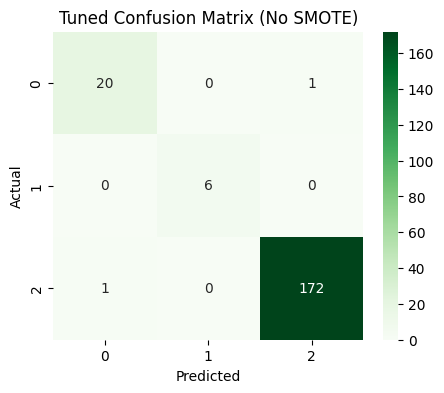

✅ Best model saved as xgb_tuned_model_without_smote.joblib


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, make_scorer, recall_score
from xgboost import XGBClassifier
import joblib

# 1. Preprocessing

# Assuming 'df' is the dataframe containing your data
# Encode categorical columns (e.g., 'Gender' and 'Class')
label_encoder = LabelEncoder()

# Encode 'Gender' column (e.g., M = 1, F = 0)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encode 'Class' column (assuming binary classification: Y = 1, N = 0)
df['Class'] = label_encoder.fit_transform(df['Class'])

# 2. Split the data into features (X) and target (y)
X = df.drop(columns=['Class'])  # All columns except the target variable 'Class'
y = df['Class']  # Target variable

# 3. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the features (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define the recall scorer for class 1 (positive class)
recall_class1 = make_scorer(recall_score, average=None, labels=[1])

# 6. Hyperparameter tuning with RandomizedSearchCV and XGBoost
pipe = XGBClassifier(
    objective="binary:logistic",
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Hyperparameter grid
param_distributions = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 4, 6, 8],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5],
    "min_child_weight": [1, 3, 5]
}

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=25,
    scoring=recall_class1,  # Focus on recall of class 1
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Train the model
search.fit(X_train_scaled, y_train)

# Print best hyperparameters and score
print("\nBest Params (optimized for Recall on Class 1):", search.best_params_)
print("Best CV Recall for Class 1:", search.best_score_)

# 7. Evaluate the tuned model
best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\n=== Tuned XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Macro F1:", f1_score(y_test, y_pred_best, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens")
plt.title("Tuned Confusion Matrix (No SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Save the best model
joblib.dump(best_model, "xgb_tuned_model_without_smote.joblib")
print("✅ Best model saved as xgb_tuned_model_without_smote.joblib")


Before SMOTE: Counter({2: 671, 0: 82, 1: 47})
After SMOTE: Counter({0: 671, 2: 671, 1: 671})
Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Params (optimized for Recall on Class 1 with SMOTE): {'clf__subsample': 1.0, 'clf__n_estimators': 300, 'clf__min_child_weight': 5, 'clf__max_depth': 4, 'clf__learning_rate': 0.03, 'clf__gamma': 5, 'clf__colsample_bytree': 0.8}
Best CV Recall for Class 1: 1.0

=== Tuned XGBoost with SMOTE ===
Accuracy: 0.965
Macro F1: 0.9454979631970782

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        21
           1       1.00      1.00      1.00         6
           2       1.00      0.96      0.98       173

    accuracy                           0.96       200
   macro avg       0.92      0.99      0.95       200
weighted avg       0.97      0.96      0.97       200



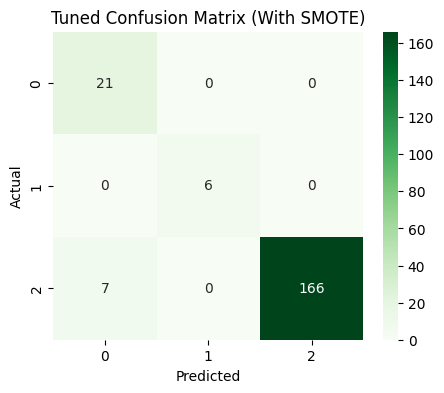

✅ Best model saved as xgb_tuned_model_with_smote.joblib


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, make_scorer, recall_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

# 1. Preprocessing

# Assuming 'df' is the dataframe containing your data
# Encode categorical columns (e.g., 'Gender' and 'Class')
label_encoder = LabelEncoder()

# Encode 'Gender' column (e.g., M = 1, F = 0)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encode 'Class' column (assuming binary classification: Y = 1, N = 0)
df['Class'] = label_encoder.fit_transform(df['Class'])

# 2. Split the data into features (X) and target (y)
X = df.drop(columns=['Class'])  # All columns except the target variable 'Class'
y = df['Class']  # Target variable

# 3. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the features (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Apply SMOTE for balancing the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Print class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

# 6. Define the recall scorer for class 1 (positive class)
recall_class1 = make_scorer(recall_score, average=None, labels=[1])

# 7. Hyperparameter tuning with RandomizedSearchCV and XGBoost
pipe = ImbPipeline([
    ("smote", SMOTE(random_state=42)),  # Apply SMOTE in the pipeline
    ("clf", XGBClassifier(
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

# Hyperparameter grid
param_distributions = {
    "clf__n_estimators": [100, 200, 300, 400],
    "clf__max_depth": [3, 4, 6, 8],
    "clf__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "clf__subsample": [0.6, 0.8, 1.0],
    "clf__colsample_bytree": [0.6, 0.8, 1.0],
    "clf__gamma": [0, 1, 5],
    "clf__min_child_weight": [1, 3, 5]
}

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=25,
    scoring=recall_class1,  # Focus on recall of class 1
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Train the model
search.fit(X_train_scaled, y_train)

# Print best hyperparameters and score
print("\nBest Params (optimized for Recall on Class 1 with SMOTE):", search.best_params_)
print("Best CV Recall for Class 1:", search.best_score_)

# 8. Evaluate the tuned model
best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\n=== Tuned XGBoost with SMOTE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Macro F1:", f1_score(y_test, y_pred_best, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens")
plt.title("Tuned Confusion Matrix (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Save the best model
joblib.dump(best_model, "xgb_tuned_model_with_smote.joblib")
print("✅ Best model saved as xgb_tuned_model_with_smote.joblib")


Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Params (optimized for Recall on Class 1): {'clf__subsample': 1.0, 'clf__n_estimators': 300, 'clf__min_child_weight': 5, 'clf__max_depth': 4, 'clf__learning_rate': 0.03, 'clf__gamma': 5, 'clf__colsample_bytree': 0.8}
Best CV Recall for Class 1: 1.0

=== Tuned XGBoost ===
Accuracy: 0.965
Macro F1: 0.9454979631970782

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        21
           1       1.00      1.00      1.00         6
           2       1.00      0.96      0.98       173

    accuracy                           0.96       200
   macro avg       0.92      0.99      0.95       200
weighted avg       0.97      0.96      0.97       200



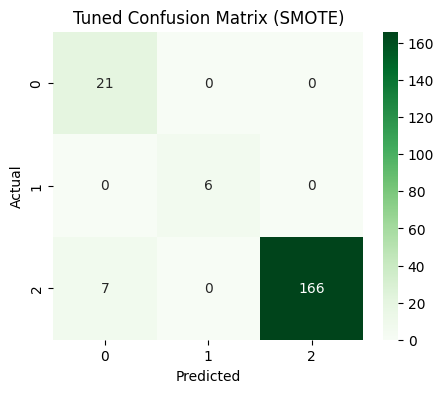

In [85]:
from sklearn.metrics import make_scorer, recall_score


recall_class1 = make_scorer(recall_score, average=None, labels=[1])

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=25,
    scoring=recall_class1,  # focus on recall of class 1
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_scaled, y_train)

print("\nBest Params (optimized for Recall on Class 1):", search.best_params_)
print("Best CV Recall for Class 1:", search.best_score_)


best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\n=== Tuned XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Macro F1:", f1_score(y_test, y_pred_best, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens")
plt.title("Tuned Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [86]:
import pickle

# Save the trained model (assuming your best model is stored in `best_model`)
with open("best_xgb_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model has been pickled and saved as 'best_model.pkl'.")


✅ Model has been pickled and saved as 'best_model.pkl'.


###### Rough

In [45]:
import os
import joblib

# Get the current working directory (same folder as the script)
current_dir = os.getcwd()

# Save the model in the same folder
model_path = os.path.join(current_dir, "xgb.joblib")
joblib.dump(best_pipeline, model_path)
print("Model Stored!")

Model Stored!


In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)
print(cm)


[[ 21   0   0]
 [  0   6   0]
 [  7   0 166]]
